#### SVM

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.794 total time=   2.1s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.788 total time=   1.1s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.771 total time=   0.9s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.778 total time=   0.9s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.761 total time=   1.2s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.829 total time=   1.4s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.819 total time=   1.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.784 total time=   0.8s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.794 total time=   0.7s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.782 total time=   0.4s
[CV 1/5] END ................C=1, kernel=linear;, score=0.872 total time=   0.6s
[CV 2/5] END ................C=1, kernel=linear;,

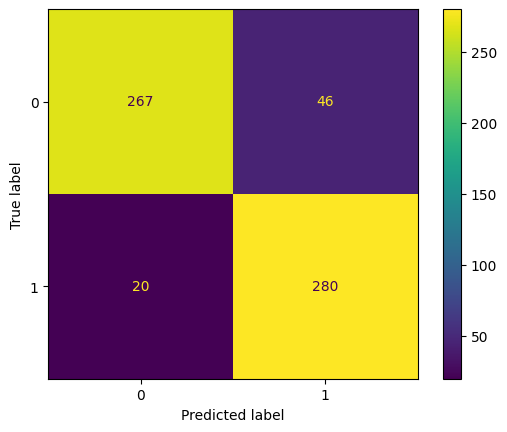

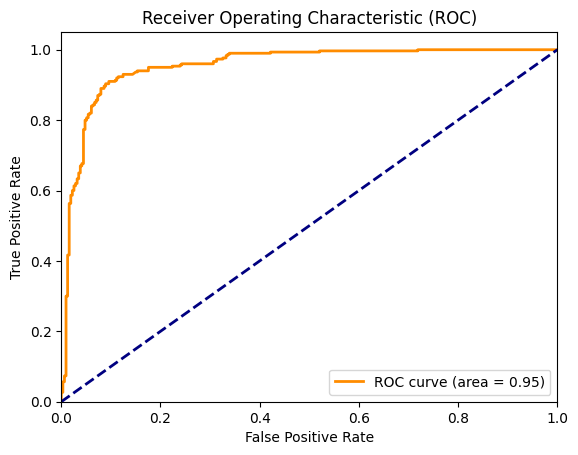

In [ ]:
from sklearn.svm import SVC

svm_param_grid = {'C': [0.01, 0.1, 1, 10, 100,1000],
              'kernel': ['linear']}

svm_grid = GridSearchCV(SVC(probability=True), svm_param_grid, refit = True, verbose = 3)

# fitting the model for grid search
svm_grid.fit(X_train_scaled, y_train)

# print best parameter after tuning
print("best parameter after tuning: ", svm_grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Model after hyper-parameter tuning: ",svm_grid.best_estimator_)

# Predict the target variable for the scaled test data
y_pred_svm = svm_grid.predict(X_test_scaled)
compute_metrics(y_test,y_pred_svm,svm_grid)

In [ ]:
save_svm = {
    'model': svm_grid,
    'scaler': scaler,
    'best_params': svm_grid.best_params_
}

with open('model_svm.pkl', 'wb') as model_file:
    pickle.dump(save_svm, model_file)